| **Inicio** | **atrás 2** | **Siguiente 4** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./2_Machine_Learning.ipynb)| [⏩](./4_Machine_Learning.ipynb)|

# **21. Machine Learning Pipelines A-Z**

Un pipeline en el contexto de Machine Learning (ML) se refiere a la concatenación de varios pasos en un flujo de trabajo. Estos pasos pueden incluir preprocesamiento de datos, selección de características, entrenamiento de modelos y evaluación. Utilizar pipelines en ML tiene varios beneficios, como facilitar la replicabilidad, reducir la posibilidad de errores y simplificar el despliegue del modelo. Aquí te proporciono una explicación detallada de cómo crear y usar pipelines en scikit-learn con ejemplos en código en Python.

**Ejemplo de Pipeline Básico:**

En este ejemplo, utilizaremos un pipeline simple con dos pasos: un escalador (`StandardScaler`) para estandarizar los datos y un clasificador (`LogisticRegression`) para entrenar el modelo.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn import datasets

# Cargar datos de ejemplo
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un pipeline con dos pasos: escalador y clasificador
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

# Entrenar el modelo usando el pipeline
pipeline.fit(X_train, y_train)

# Evaluar el modelo
accuracy = pipeline.score(X_test, y_test)
print(f'Accuracy del modelo: {accuracy}')

Accuracy del modelo: 1.0


En este ejemplo, el pipeline primero estandariza los datos utilizando `StandardScaler` y luego entrena un modelo de regresión logística (`LogisticRegression`). El modelo entrenado se evalúa en un conjunto de prueba.

**Uso de GridSearchCV con Pipelines:**

Un beneficio clave de los pipelines es su compatibilidad con `GridSearchCV` para la búsqueda de hiperparámetros. Aquí hay un ejemplo que muestra cómo realizar una búsqueda de cuadrícula para encontrar el mejor conjunto de hiperparámetros para un clasificador de vectores de soporte (`SVC`).

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Crear un pipeline con un clasificador de vectores de soporte (SVC)
pipeline_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

# Definir la cuadrícula de hiperparámetros para la búsqueda
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf']
}

# Crear un objeto GridSearchCV con el pipeline y la cuadrícula de hiperparámetros
grid_search = GridSearchCV(pipeline_svc, param_grid=param_grid, cv=5, n_jobs=-1)

# Realizar la búsqueda de cuadrícula en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros y la precisión del modelo
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Accuracy del modelo:", grid_search.best_score_)

Mejores hiperparámetros: {'classifier__C': 0.1, 'classifier__kernel': 'linear'}
Accuracy del modelo: 0.9583333333333334


En este ejemplo, `GridSearchCV` realiza una búsqueda de cuadrícula para encontrar los mejores hiperparámetros (`C` y `kernel`) para el clasificador de vectores de soporte dentro del pipeline. El pipeline incluye la estandarización de datos antes de aplicar el clasificador.

**Beneficios de los Pipelines:**

- **Replicabilidad:** Los pipelines aseguran que cada paso del flujo de trabajo se realice en el orden correcto, lo que facilita la replicabilidad del experimento.

- **Facilidad de Despliegue:** Al encapsular todos los pasos en un solo objeto, los pipelines facilitan la implementación de modelos en entornos de producción.

- **Evita Data Leakage:** Los pipelines ayudan a evitar la fuga de datos al garantizar que todas las transformaciones se realicen en el conjunto de entrenamiento antes de aplicar el modelo.

En resumen, los pipelines son una herramienta esencial en Machine Learning que simplifica el flujo de trabajo, mejora la replicabilidad y facilita la implementación de modelos en producción.

![Pipeles](../../img/pipeles.png "Pipeles")

# **22. Transformador de funciones | Transformación de registro | Transformación recíproca | Transformación de raíz cuadrada**

Las transformaciones de funciones son técnicas comunes en preprocesamiento de datos en aprendizaje automático para modificar la distribución de las variables, haciéndolas más adecuadas para los modelos. Aquí, discutiré tres transformaciones comunes: Transformación de registro, Transformación recíproca y Transformación de raíz cuadrada.

**1. Transformación de Registro:**

La transformación de registro se utiliza para reducir la variabilidad y hacer que la distribución de los datos sea más simétrica. Es útil cuando los datos tienen una distribución sesgada hacia la derecha.

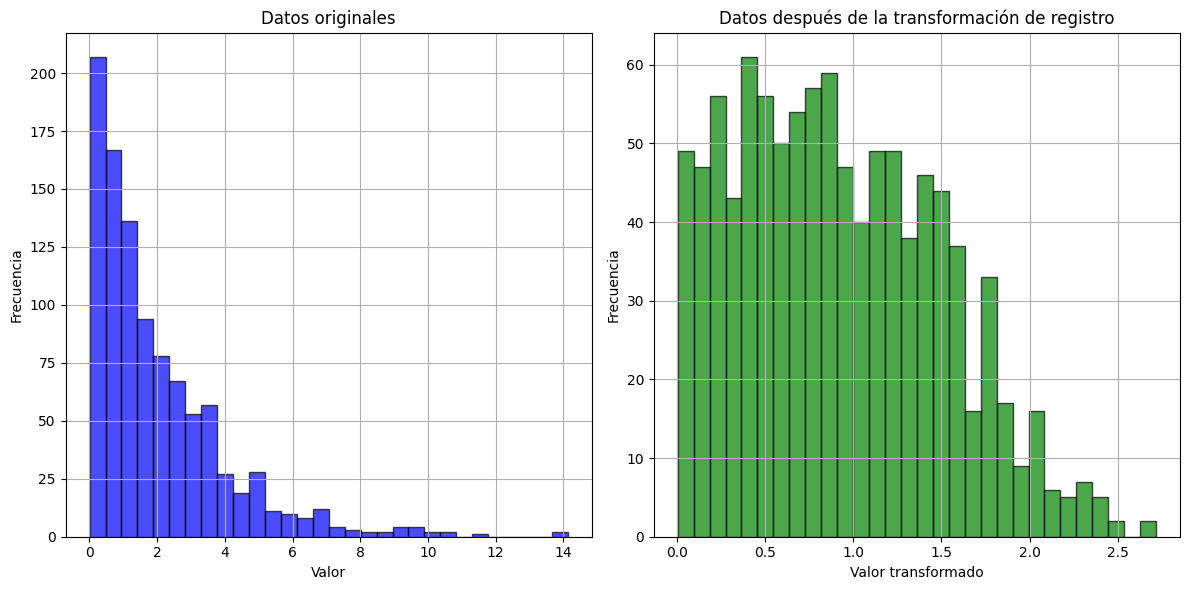

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos con sesgo hacia la derecha
data = np.random.exponential(scale=2, size=1000)

# Aplicar transformación de registro
transformed_data = np.log1p(data)

# Personalizar la gráfica
plt.figure(figsize=(12, 6))

# Gráfica para datos originales
plt.subplot(1, 2, 1)
plt.hist(data, bins=30, edgecolor='black', color='blue', alpha=0.7)  # Color y transparencia
plt.title('Datos originales')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(True)  # Agregar cuadrícula

# Gráfica para datos transformados
plt.subplot(1, 2, 2)
plt.hist(transformed_data, bins=30, edgecolor='black', color='green', alpha=0.7)  # Color y transparencia
plt.title('Datos después de la transformación de registro')
plt.xlabel('Valor transformado')
plt.ylabel('Frecuencia')
plt.grid(True)  # Agregar cuadrícula

# Ajustar el espacio entre las subgráficas
plt.tight_layout()

# Mostrar la gráfica
plt.show()

**2. Transformación Recíproca:**

La transformación recíproca implica tomar el recíproco de los valores. Es útil cuando los datos están sesgados hacia cero.

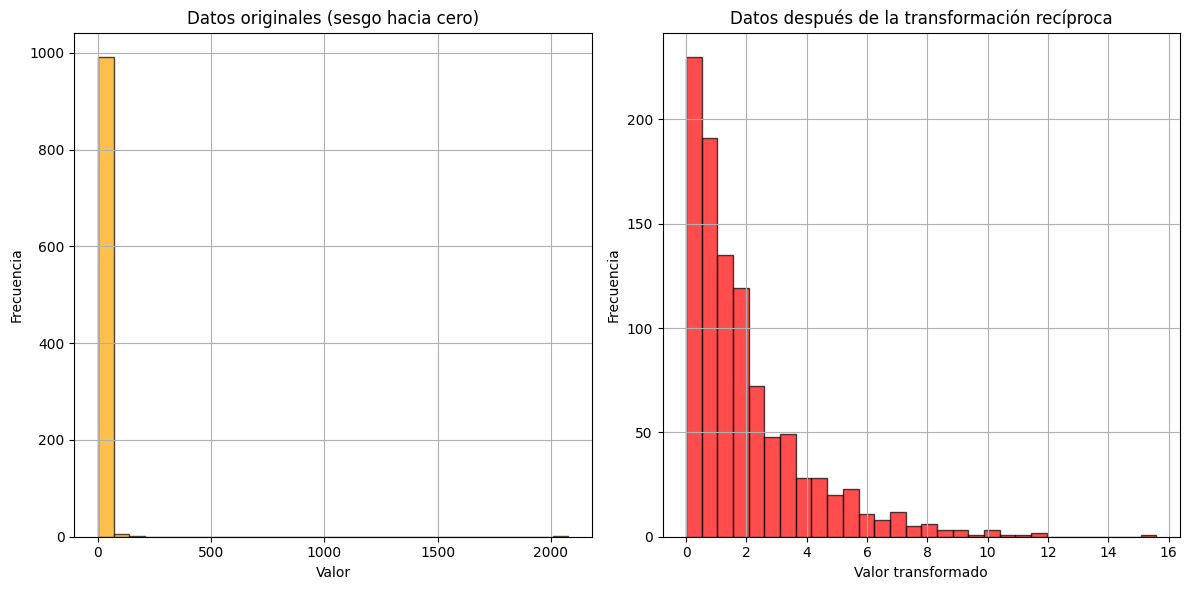

In [4]:
# Generar datos con sesgo hacia cero
data_reciprocal = 1 / (np.random.exponential(scale=2, size=1000) + 1e-6)

# Aplicar transformación recíproca
transformed_data_reciprocal = 1 / data_reciprocal

# Personalizar la gráfica
plt.figure(figsize=(12, 6))

# Gráfica para datos originales (sesgo hacia cero)
plt.subplot(1, 2, 1)
plt.hist(data_reciprocal, bins=30, edgecolor='black', color='orange', alpha=0.7)  # Color y transparencia
plt.title('Datos originales (sesgo hacia cero)')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(True)  # Agregar cuadrícula

# Gráfica para datos transformados
plt.subplot(1, 2, 2)
plt.hist(transformed_data_reciprocal, bins=30, edgecolor='black', color='red', alpha=0.7)  # Color y transparencia
plt.title('Datos después de la transformación recíproca')
plt.xlabel('Valor transformado')
plt.ylabel('Frecuencia')
plt.grid(True)  # Agregar cuadrícula

# Ajustar el espacio entre las subgráficas
plt.tight_layout()

# Mostrar la gráfica
plt.show()

**3. Transformación de Raíz Cuadrada:**

La transformación de raíz cuadrada se utiliza para reducir la dispersión de los datos y hacer que la distribución sea más simétrica. Es útil cuando los datos tienen una distribución sesgada hacia la derecha.

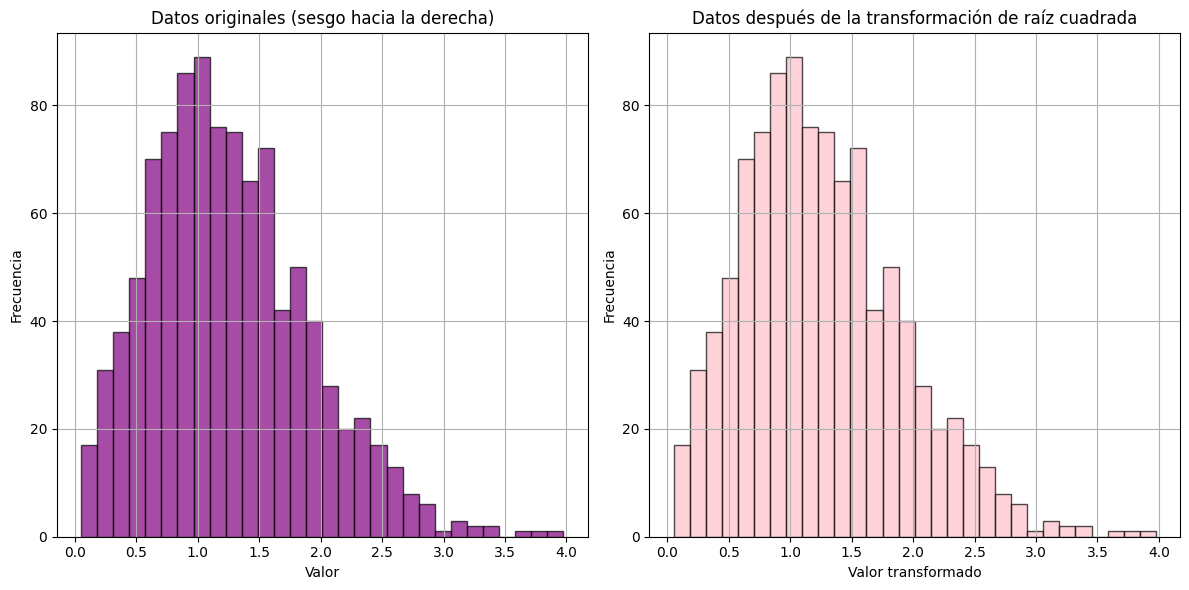

In [5]:
# Generar datos con sesgo hacia la derecha
data_sqrt = np.sqrt(np.random.exponential(scale=2, size=1000))

# Visualizar los datos antes y después de la transformación de raíz cuadrada
plt.figure(figsize=(12, 6))

# Gráfica para datos originales (sesgo hacia la derecha)
plt.subplot(1, 2, 1)
plt.hist(data_sqrt, bins=30, edgecolor='black', color='purple', alpha=0.7)  # Color y transparencia
plt.title('Datos originales (sesgo hacia la derecha)')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(True)  # Agregar cuadrícula

# Gráfica para datos transformados después de la transformación de raíz cuadrada
plt.subplot(1, 2, 2)
plt.hist(data_sqrt, bins=30, edgecolor='black', color='pink', alpha=0.7)  # Usar el nombre correcto
plt.title('Datos después de la transformación de raíz cuadrada')
plt.xlabel('Valor transformado')
plt.ylabel('Frecuencia')
plt.grid(True)  # Agregar cuadrícula

# Ajustar el espacio entre las subgráficas
plt.tight_layout()

# Mostrar la gráfica
plt.show()

Estas transformaciones pueden ayudar a mejorar la interpretación de los modelos, especialmente cuando se enfrentan a datos sesgados o no normalmente distribuidos. Sin embargo, es importante recordar que la elección de la transformación debe basarse en el entendimiento del problema y los datos específicos. Además, debes ser consciente de que estas transformaciones pueden no ser apropiadas para todos los tipos de datos y distribuciones.

# **23. Transformador de potencia | Caja - Transformación de Cox | Yeo - Transformación de Johnson**

**Transformador de Potencia (Power Transformer):**

El transformador de potencia es una técnica que se utiliza para estabilizar la varianza y hacer que los datos se asemejen más a una distribución normal. Esta transformación se aplica mediante funciones de potencia como la raíz cuadrada, el logaritmo, la inversa, etc. Scikit-learn proporciona una clase `PowerTransformer` que puede aplicar esta transformación.

Ejemplo en código:

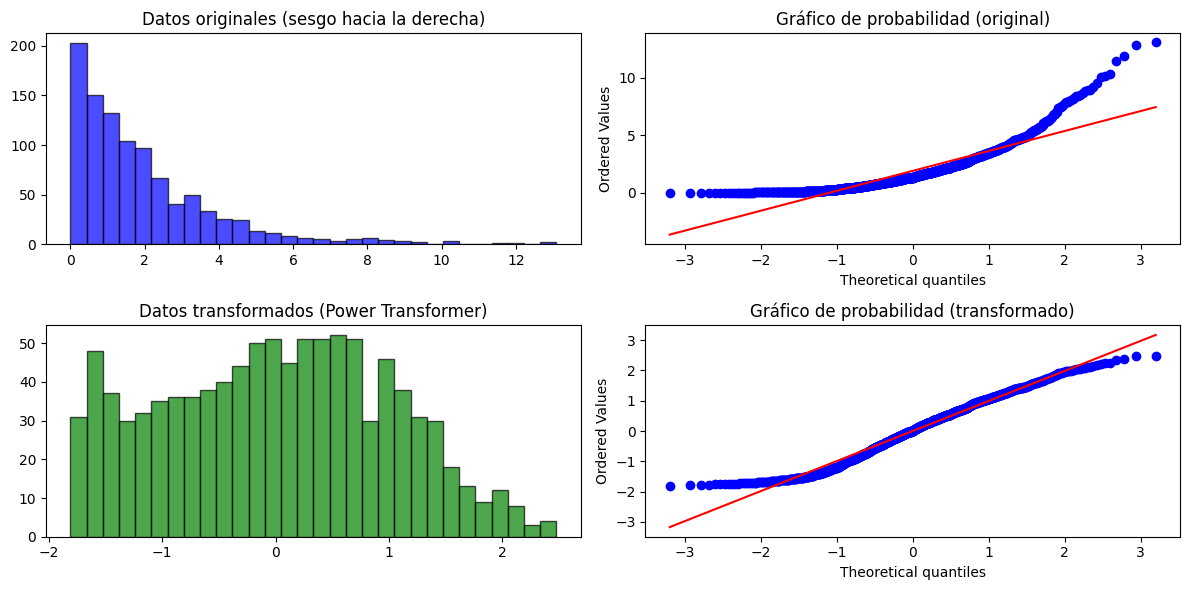

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from scipy.stats import probplot

# Generar datos con sesgo hacia la derecha
data_skewed = np.random.exponential(scale=2, size=1000)

# Aplicar transformación de potencia
power_transformer = PowerTransformer(method='yeo-johnson')  # Puedes elegir 'box-cox' o 'yeo-johnson'
transformed_data = power_transformer.fit_transform(data_skewed.reshape(-1, 1))

# Visualizar los datos antes y después de la transformación de potencia
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.hist(data_skewed, bins=30, edgecolor='black', color='blue', alpha=0.7)
plt.title('Datos originales (sesgo hacia la derecha)')

plt.subplot(2, 2, 2)
probplot(data_skewed, plot=plt)
plt.title('Gráfico de probabilidad (original)')

plt.subplot(2, 2, 3)
plt.hist(transformed_data, bins=30, edgecolor='black', color='green', alpha=0.7)
plt.title('Datos transformados (Power Transformer)')

plt.subplot(2, 2, 4)
probplot(transformed_data.squeeze(), plot=plt)
plt.title('Gráfico de probabilidad (transformado)')

plt.tight_layout()
plt.show()

En este ejemplo, `PowerTransformer` se utiliza con el método `'yeo-johnson'`, que es una generalización del método `'box-cox'` y puede manejar datos que contienen ceros o valores negativos.

**Transformación de Cox (Cox Transformation):**

La transformación de Cox no se aplica directamente a los datos, como en el caso de una transformación de potencia. Se utiliza en el contexto de modelos de riesgos proporcionales de Cox en análisis de supervivencia. Aquí hay un ejemplo básico sin aplicar directamente la transformación:

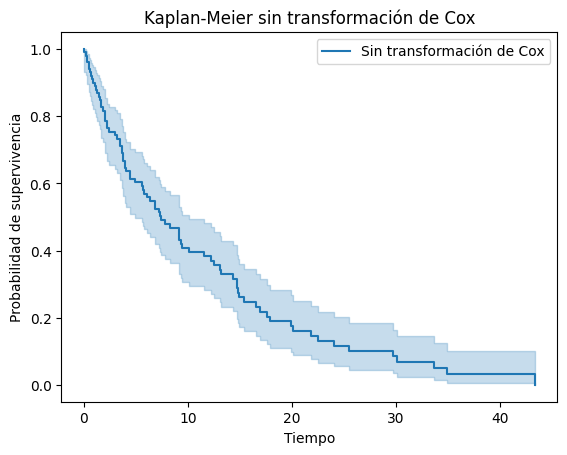

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Generar datos de supervivencia aleatorios
np.random.seed(42)
observed_time = np.random.exponential(scale=10, size=100)
event_occurred = np.random.choice([0, 1], size=100, p=[0.2, 0.8])

# Crear un DataFrame para utilizar con lifelines
import pandas as pd
data = pd.DataFrame({'time': observed_time, 'event': event_occurred})

# Graficar Kaplan-Meier sin transformación de Cox
kmf = KaplanMeierFitter()
kmf.fit(durations=data['time'], event_observed=data['event'])
kmf.plot_survival_function(label='Sin transformación de Cox')

# Mostrar la gráfica
plt.title('Kaplan-Meier sin transformación de Cox')
plt.xlabel('Tiempo')
plt.ylabel('Probabilidad de supervivencia')
plt.legend()
plt.show()

**Transformación de Yeo-Johnson:**

La transformación de Yeo-Johnson es otra técnica de transformación de potencia que puede manejar un rango más amplio de datos que la transformación de Box-Cox. Scikit-learn proporciona una clase `PowerTransformer` que implementa la transformación de Yeo-Johnson.

Ejemplo en código:

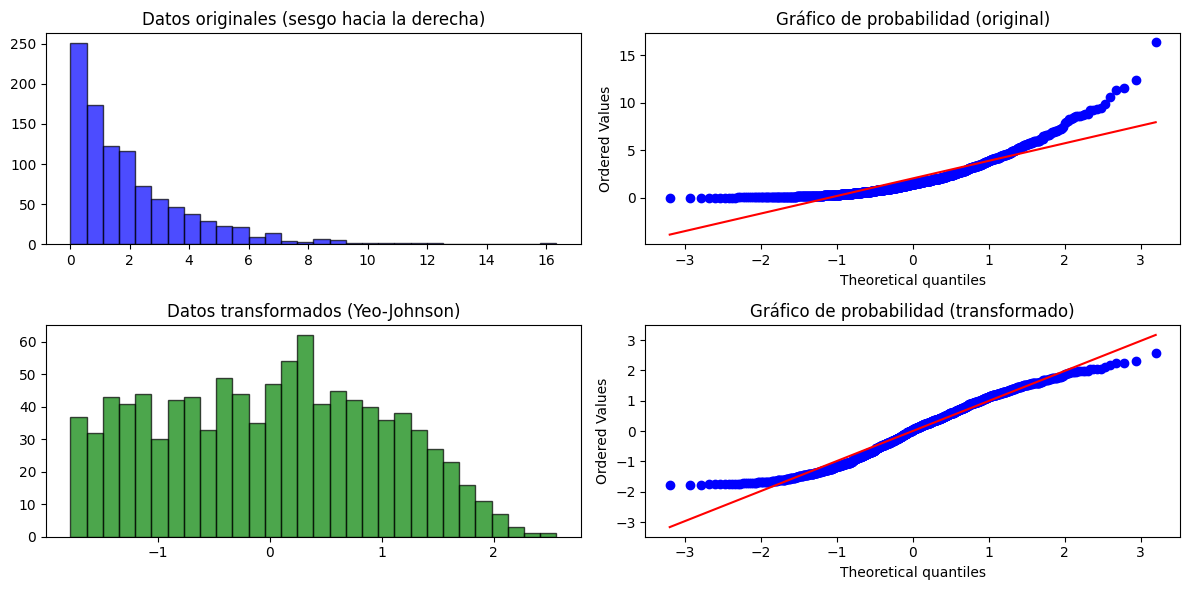

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from scipy.stats import probplot

# Generar datos con sesgo hacia la derecha
data_skewed = np.random.exponential(scale=2, size=1000)

# Aplicar transformación de Yeo-Johnson
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')
transformed_data_yj = yeo_johnson_transformer.fit_transform(data_skewed.reshape(-1, 1))

# Visualizar los datos antes y después de la transformación de Yeo-Johnson
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.hist(data_skewed, bins=30, edgecolor='black', color='blue', alpha=0.7)
plt.title('Datos originales (sesgo hacia la derecha)')

plt.subplot(2, 2, 2)
probplot(data_skewed, plot=plt)
plt.title('Gráfico de probabilidad (original)')

plt.subplot(2, 2, 3)
plt.hist(transformed_data_yj, bins=30, edgecolor='black', color='green', alpha=0.7)
plt.title('Datos transformados (Yeo-Johnson)')

plt.subplot(2, 2, 4)
probplot(transformed_data_yj.squeeze(), plot=plt)
plt.title('Gráfico de probabilidad (transformado)')

plt.tight_layout()
plt.show()

En este ejemplo, `PowerTransformer` se utiliza con el método `'yeo-johnson'`, que puede manejar datos que contienen ceros o valores negativos.

# **24. Binning y binarización | Discretización | Agrupación de cuantiles | KMeans agrupación**

**Binning y Binarización:**

**Binning (Agrupación):** Es el proceso de dividir un conjunto de datos continuos en rangos discretos o "contenedores". Esto se hace para convertir datos numéricos en categorías y facilitar su análisis. Un ejemplo común es agrupar edades en rangos como "niños", "adolescentes", "adultos jóvenes", etc.

**Binarización:** Es el proceso de convertir datos continuos en datos binarios, generalmente usando un umbral. Los valores por debajo del umbral se convierten en 0, y los valores por encima o iguales al umbral se convierten en 1. Esto se utiliza cuando solo nos interesa saber si un valor supera cierto límite.

Ejemplo en código:

In [9]:
import numpy as np
from sklearn.preprocessing import Binarizer

# Generar datos continuos
data_continuous = np.random.rand(10, 1) * 10

# Binning (Agrupación)
bins = [0, 3, 6, 9, 10]
binned_data = np.digitize(data_continuous, bins=bins)

# Asignar etiquetas
labels = ['Grupo 1', 'Grupo 2', 'Grupo 3', 'Grupo 4']
binned_data_with_labels = np.array(labels)[binned_data-1]

# Binarización
binarizer = Binarizer(threshold=5)
binarized_data = binarizer.fit_transform(data_continuous)

print("Datos continuos:")
print(data_continuous)

print("\nDatos agrupados:")
print(binned_data_with_labels)

print("\nDatos binarizados:")
print(binarized_data)

Datos continuos:
[[7.58263196]
 [0.24586916]
 [0.22123552]
 [3.23610219]
 [4.8864319 ]
 [7.70407418]
 [6.83295377]
 [4.45902706]
 [2.73626666]
 [9.971245  ]]

Datos agrupados:
[['Grupo 3']
 ['Grupo 1']
 ['Grupo 1']
 ['Grupo 2']
 ['Grupo 2']
 ['Grupo 3']
 ['Grupo 3']
 ['Grupo 2']
 ['Grupo 1']
 ['Grupo 4']]

Datos binarizados:
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]]


En este ejemplo, `np.digitize` realiza la agrupación en contenedores especificados por los límites en `bins`. La binarización se realiza con `Binarizer` de scikit-learn.

**Discretización:**

Es similar a la agrupación, pero aquí se busca discretizar variables continuas en intervalos regulares. Se utiliza, por ejemplo, para convertir datos continuos en datos categóricos.

Ejemplo en código:

In [10]:
from sklearn.preprocessing import KBinsDiscretizer

# Generar datos continuos
data_continuous = np.random.rand(10, 1) * 10

# Discretización
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform', subsample=None)
discretized_data = discretizer.fit_transform(data_continuous)

print("Datos continuos:")
print(data_continuous)

print("\nDatos discretizados:")
print(discretized_data)

Datos continuos:
[[4.26181302]
 [4.51387024]
 [1.63623821]
 [7.94809549]
 [6.93682226]
 [2.20769613]
 [0.82381046]
 [6.80499302]
 [6.54511214]
 [2.73259527]]

Datos discretizados:
[[1.]
 [1.]
 [0.]
 [2.]
 [2.]
 [0.]
 [0.]
 [2.]
 [2.]
 [0.]]


En este ejemplo, `KBinsDiscretizer` divide los datos en 3 intervalos uniformemente.

**Agrupación de Cuantiles:**

Este método agrupa datos de manera que cada grupo tiene aproximadamente el mismo número de observaciones. Es útil cuando se quiere asegurar que cada grupo tenga una cantidad similar de datos.

Ejemplo en código:

In [11]:
from sklearn.preprocessing import QuantileTransformer

# Generar datos continuos
data_continuous = np.random.rand(10, 1) * 10

# Agrupación de cuantiles
quantile_transformer = QuantileTransformer(n_quantiles=3, random_state=42)
quantile_grouped_data = quantile_transformer.fit_transform(data_continuous)

print("Datos continuos:")
print(data_continuous)

print("\nDatos agrupados por cuantiles:")
print(quantile_grouped_data)

Datos continuos:
[[9.50863562]
 [1.51057892]
 [4.32334801]
 [9.4361592 ]
 [4.19727317]
 [6.38525948]
 [3.97594398]
 [2.74215202]
 [9.83977648]
 [4.09334006]]

Datos agrupados por cuantiles:
[[0.97032504]
 [0.        ]
 [0.50564906]
 [0.96383012]
 [0.48853753]
 [0.69042583]
 [0.44829193]
 [0.22394423]
 [1.        ]
 [0.46963876]]


En este ejemplo, `QuantileTransformer` agrupa los datos en cuantiles.

**KMeans Agrupación:**

El algoritmo de KMeans es comúnmente utilizado para agrupar datos en clústeres basados en la similitud entre observaciones. Aunque comúnmente se utiliza en aprendizaje no supervisado, se puede emplear para crear grupos que luego pueden considerarse como categorías discretas.

Ejemplo en código:

In [12]:
from sklearn.cluster import KMeans

# Generar datos continuos
data_continuous = np.random.rand(10, 1) * 10

# KMeans Agrupación
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)  # Puedes ajustar el valor de n_init según tus necesidades
kmeans.fit(data_continuous)
kmeans_grouped_data = kmeans.labels_

print("Datos continuos:")
print(data_continuous)

print("\nDatos agrupados por KMeans:")
print(kmeans_grouped_data)

Datos continuos:
[[8.94099204]
 [2.29954606]
 [2.13104704]
 [0.31134083]
 [6.51666825]
 [3.68526344]
 [8.6435825 ]
 [4.73209907]
 [9.68193428]
 [1.85525516]]

Datos agrupados por KMeans:
[0 1 1 1 2 2 0 2 0 1]


En este ejemplo, `KMeans` agrupa los datos en 3 clústeres. Los números asignados a cada punto indican a qué clúster pertenecen.

Estos métodos son útiles en diversas situaciones dependiendo de la naturaleza de los datos y el objetivo del análisis.

# **25. Manejo de variables mixtas | Ingeniería de características**

El manejo de variables mixtas y la ingeniería de características son aspectos importantes en el proceso de preparación de datos en machine learning. Las variables mixtas se refieren a conjuntos de datos que contienen tanto variables numéricas como categóricas. La ingeniería de características implica crear nuevas variables o modificar las existentes para mejorar el rendimiento del modelo.

**Manejo de Variables Mixtas:**

1. **Codificación de Variables Categóricas:**
   - Para las variables categóricas, puedes usar técnicas como la codificación one-hot (si hay pocos valores únicos) o la codificación ordinal (si existe un orden natural).

   Ejemplo en código:

In [13]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Crear un DataFrame de ejemplo con variables mixtas
data = pd.DataFrame({
       'numerica': [1, 2, 3, 4],
       'categorica': ['A', 'B', 'A', 'C']})

# Codificación one-hot para la variable categórica
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_data = pd.concat([data[['numerica']], pd.DataFrame(encoder.fit_transform(data[['categorica']]))], axis=1)

print("Datos originales:")
print(data)

print("\nDatos codificados:")
print(encoded_data)

Datos originales:
   numerica categorica
0         1          A
1         2          B
2         3          A
3         4          C

Datos codificados:
   numerica    0    1
0         1  0.0  0.0
1         2  1.0  0.0
2         3  0.0  0.0
3         4  0.0  1.0


/home/puma/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


2. **Manejo de Variables Numéricas y Categóricas:**
   - Algunas técnicas, como la imputación, pueden aplicarse de manera diferente a variables numéricas y categóricas. Por ejemplo, puedes imputar la media para variables numéricas y el valor más común para variables categóricas.

   Ejemplo en código:

In [14]:
from sklearn.impute import SimpleImputer

# Crear un DataFrame de ejemplo con valores faltantes
data_missing = pd.DataFrame({
       'numerica': [1, 2, np.nan, 4],
       'categorica': ['A', 'B', np.nan, 'C']})

# Imputación para variables numéricas y categóricas
imputer_numeric = SimpleImputer(strategy='mean')
imputer_categorical = SimpleImputer(strategy='most_frequent')

data_imputed = pd.concat([
       pd.DataFrame(imputer_numeric.fit_transform(data_missing[['numerica']])),
       pd.DataFrame(imputer_categorical.fit_transform(data_missing[['categorica']]))], axis=1)

print("Datos originales:")
print(data_missing)

print("\nDatos imputados:")
print(data_imputed)

Datos originales:
   numerica categorica
0       1.0          A
1       2.0          B
2       NaN        NaN
3       4.0          C

Datos imputados:
          0  0
0  1.000000  A
1  2.000000  B
2  2.333333  A
3  4.000000  C


**Ingeniería de Características:**

1. **Creación de Características Nuevas:**
   - Puedes combinar o transformar variables existentes para crear nuevas características que puedan ser más informativas para el modelo.

   Ejemplo en código:

In [15]:
# Crear un DataFrame de ejemplo
data_feature_engineering = pd.DataFrame({
       'feature_1': [2, 5, 8, 11],
       'feature_2': [4, 3, 7, 2]})

# Crear una nueva característica como combinación lineal de las existentes
data_feature_engineering['new_feature'] = 2 * data_feature_engineering['feature_1'] + 3 * data_feature_engineering['feature_2']

print("Datos originales:")
print(data_feature_engineering)

Datos originales:
   feature_1  feature_2  new_feature
0          2          4           16
1          5          3           19
2          8          7           37
3         11          2           28


2. **Normalización o Estandarización:**
   - Para asegurar que las variables numéricas tengan la misma escala, puedes aplicar técnicas de normalización o estandarización.

   Ejemplo en código:

In [16]:
from sklearn.preprocessing import StandardScaler

# Crear un DataFrame de ejemplo con variables numéricas
data_scaling = pd.DataFrame({
       'feature_1': [2, 5, 8, 11],
       'feature_2': [4, 3, 7, 2]})

# Estandarización de las variables numéricas
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data_scaling), columns=data_scaling.columns)

print("Datos originales:")
print(data_scaling)

print("\nDatos escalados:")
print(scaled_data)

Datos originales:
   feature_1  feature_2
0          2          4
1          5          3
2          8          7
3         11          2

Datos escalados:
   feature_1  feature_2
0  -1.341641   0.000000
1  -0.447214  -0.534522
2   0.447214   1.603567
3   1.341641  -1.069045


Estos son solo ejemplos básicos, y el manejo de variables mixtas y la ingeniería de características pueden volverse más complejos según el conjunto de datos y el problema específico. El enfoque preciso dependerá del contexto y los requisitos del modelo que estés construyendo.

# **26. Manejo de variables de fecha y hora**

El manejo de variables de fecha y hora es crucial en muchas aplicaciones de análisis de datos y machine learning. Aquí te proporciono una explicación detallada con ejemplos en código para algunas operaciones comunes.

1. **Convertir Cadena a Formato de Fecha y Hora:**
   - A menudo, las fechas y horas se almacenan como cadenas y es necesario convertirlas a objetos de fecha y hora.

In [17]:
import pandas as pd

# Crear un DataFrame de ejemplo
data = pd.DataFrame({
       'fecha_str': ['2022-01-01', '2022-02-01', '2022-03-01'],
       'valor': [10, 15, 20]})

# Convertir la columna de cadena a formato de fecha y hora
data['fecha'] = pd.to_datetime(data['fecha_str'])

print("Datos originales:")
print(data[['fecha_str', 'valor']])

print("\nDatos con formato de fecha y hora:")
print(data[['fecha', 'valor']])

Datos originales:
    fecha_str  valor
0  2022-01-01     10
1  2022-02-01     15
2  2022-03-01     20

Datos con formato de fecha y hora:
       fecha  valor
0 2022-01-01     10
1 2022-02-01     15
2 2022-03-01     20


2. **Extraer Componentes de Fecha y Hora:**
   - A veces, es útil extraer componentes individuales de fechas y horas, como el año, mes, día, hora, etc.

In [18]:
# Extraer componentes de fecha y hora
data['año'] = data['fecha'].dt.year
data['mes'] = data['fecha'].dt.month
data['dia'] = data['fecha'].dt.day
data['hora'] = data['fecha'].dt.hour

print("Datos con componentes extraídos:")
print(data[['fecha', 'año', 'mes', 'dia', 'hora']])

Datos con componentes extraídos:
       fecha   año  mes  dia  hora
0 2022-01-01  2022    1    1     0
1 2022-02-01  2022    2    1     0
2 2022-03-01  2022    3    1     0


3. **Operaciones de Fecha y Hora:**
   - Se pueden realizar diversas operaciones, como sumar o restar días, semanas, etc.

In [19]:
# Sumar 5 días a la fecha
data['nueva_fecha'] = data['fecha'] + pd.Timedelta(days=5)

print("Datos con nuevas fechas:")
print(data[['fecha', 'nueva_fecha', 'valor']])

Datos con nuevas fechas:
       fecha nueva_fecha  valor
0 2022-01-01  2022-01-06     10
1 2022-02-01  2022-02-06     15
2 2022-03-01  2022-03-06     20


4. **Filtrar por Fechas:**
   - Puedes filtrar datos según un rango de fechas.

In [20]:
# Filtrar datos para obtener solo las entradas de enero de 2022
enero_2022 = data[(data['fecha'] >= '2022-01-01') & (data['fecha'] < '2022-02-01')]

print("Datos de enero de 2022:")
print(enero_2022[['fecha', 'valor']])

Datos de enero de 2022:
       fecha  valor
0 2022-01-01     10


5. **Manejo de Zonas Horarias:**
   - Si tus datos tienen zonas horarias, puedes manejarlas adecuadamente.

In [21]:
from pytz import timezone

# Establecer la zona horaria
data['fecha_utc'] = data['fecha'].dt.tz_localize('UTC')

# Convertir a otra zona horaria
data['fecha_est'] = data['fecha_utc'].dt.tz_convert(timezone('US/Eastern'))

print("Datos con zonas horarias:")
print(data[['fecha', 'fecha_utc', 'fecha_est', 'valor']])

Datos con zonas horarias:
       fecha                 fecha_utc                 fecha_est  valor
0 2022-01-01 2022-01-01 00:00:00+00:00 2021-12-31 19:00:00-05:00     10
1 2022-02-01 2022-02-01 00:00:00+00:00 2022-01-31 19:00:00-05:00     15
2 2022-03-01 2022-03-01 00:00:00+00:00 2022-02-28 19:00:00-05:00     20


Estos son solo ejemplos básicos, y el manejo de fechas y horas puede volverse más complejo según los requisitos específicos de tu conjunto de datos y análisis. La biblioteca pandas en Python proporciona muchas funciones poderosas para trabajar con fechas y horas.

# **27. Manejo de datos faltantes**

El manejo de datos faltantes es un aspecto crucial en el análisis de datos y el aprendizaje automático. Aquí te proporciono una explicación detallada con ejemplos en código para algunas estrategias comunes.

1. **Identificación de Datos Faltantes:**
   - Antes de manejar los datos faltantes, es importante identificar dónde se encuentran. Puedes usar funciones como `isnull()` o `info()` en pandas.

In [22]:
import pandas as pd
import numpy as np

# Crear un DataFrame de ejemplo con datos faltantes
data = pd.DataFrame({
       'A': [1, 2, np.nan, 4],
       'B': [5, np.nan, np.nan, 8],
       'C': [9, 10, 11, 12]})

# Identificar datos faltantes
missing_data = data.isnull()

print("Datos originales:")
print(data)

print("\nDatos faltantes identificados:")
print(missing_data)

Datos originales:
     A    B   C
0  1.0  5.0   9
1  2.0  NaN  10
2  NaN  NaN  11
3  4.0  8.0  12

Datos faltantes identificados:
       A      B      C
0  False  False  False
1  False   True  False
2   True   True  False
3  False  False  False


2. **Eliminar Datos Faltantes:**
   - Una estrategia es eliminar filas o columnas que contienen datos faltantes. Esto se hace con `dropna()`.

In [23]:
# Eliminar filas con datos faltantes
data_sin_faltantes = data.dropna()

print("Datos originales:")
print(data)

print("\nDatos sin filas con datos faltantes:")
print(data_sin_faltantes)

Datos originales:
     A    B   C
0  1.0  5.0   9
1  2.0  NaN  10
2  NaN  NaN  11
3  4.0  8.0  12

Datos sin filas con datos faltantes:
     A    B   C
0  1.0  5.0   9
3  4.0  8.0  12


3. **Imputación Simple:**
   - Puedes rellenar los valores faltantes con algún valor específico, como la media o la mediana de la columna.

In [24]:
# Rellenar valores faltantes con la media de cada columna
data_imputada = data.fillna(data.mean())

print("Datos originales:")
print(data)

print("\nDatos con valores faltantes imputados:")
print(data_imputada)

Datos originales:
     A    B   C
0  1.0  5.0   9
1  2.0  NaN  10
2  NaN  NaN  11
3  4.0  8.0  12

Datos con valores faltantes imputados:
          A    B   C
0  1.000000  5.0   9
1  2.000000  6.5  10
2  2.333333  6.5  11
3  4.000000  8.0  12


4. **Imputación Avanzada:**
   - Utiliza técnicas más avanzadas, como la imputación mediante modelos.

In [25]:
from sklearn.impute import KNNImputer

# Crear un DataFrame de ejemplo con más datos faltantes
data_avanzada = pd.DataFrame({
       'A': [1, 2, np.nan, 4, np.nan],
       'B': [5, np.nan, np.nan, 8, np.nan],
       'C': [9, 10, 11, 12, np.nan]})

# Imputación con KNN (K Nearest Neighbors)
imputer = KNNImputer(n_neighbors=2)
data_imputada_avanzada = imputer.fit_transform(data_avanzada)

print("Datos originales:")
print(data_avanzada)

print("\nDatos con imputación avanzada:")
print(pd.DataFrame(data_imputada_avanzada, columns=data_avanzada.columns))

Datos originales:
     A    B     C
0  1.0  5.0   9.0
1  2.0  NaN  10.0
2  NaN  NaN  11.0
3  4.0  8.0  12.0
4  NaN  NaN   NaN

Datos con imputación avanzada:
          A    B     C
0  1.000000  5.0   9.0
1  2.000000  6.5  10.0
2  3.000000  6.5  11.0
3  4.000000  8.0  12.0
4  2.333333  6.5  10.5


5. **Crear Indicadores de Datos Faltantes:**
   - Puedes agregar una columna que indique si un valor estaba presente o no.

In [26]:
# Crear indicadores de datos faltantes
data['A_faltante'] = data['A'].isnull().astype(int)
data['B_faltante'] = data['B'].isnull().astype(int)

print("Datos originales con indicadores:")
print(data)

Datos originales con indicadores:
     A    B   C  A_faltante  B_faltante
0  1.0  5.0   9           0           0
1  2.0  NaN  10           0           1
2  NaN  NaN  11           1           1
3  4.0  8.0  12           0           0


Estas estrategias son solo algunas de las muchas opciones disponibles. La elección de la estrategia dependerá del contexto específico de tus datos y del problema que estás abordando.

# **28. Manejo de datos faltantes | Datos numéricos | Computadora simple**

Cuando tienes datos numéricos y deseas manejar valores faltantes en una computadora simple, hay varias estrategias que puedes seguir. Aquí te proporciono una explicación detallada con ejemplos en código.

1. **Identificación de Datos Faltantes:**
   - Antes de manejar los datos faltantes, es importante identificar dónde se encuentran. Puedes usar funciones como `isnull()` en pandas.

In [27]:
import pandas as pd
import numpy as np

# Crear un DataFrame de ejemplo con datos faltantes
data = pd.DataFrame({
       'A': [1, 2, np.nan, 4],
       'B': [5, np.nan, np.nan, 8],
       'C': [9, 10, 11, 12]})

# Identificar datos faltantes
missing_data = data.isnull()

print("Datos originales:")
print(data)

print("\nDatos faltantes identificados:")
print(missing_data)

Datos originales:
     A    B   C
0  1.0  5.0   9
1  2.0  NaN  10
2  NaN  NaN  11
3  4.0  8.0  12

Datos faltantes identificados:
       A      B      C
0  False  False  False
1  False   True  False
2   True   True  False
3  False  False  False


2. **Eliminar Datos Faltantes:**
   - Una estrategia simple es eliminar filas o columnas que contienen datos faltantes. Esto se hace con `dropna()`.

In [28]:
# Eliminar filas con datos faltantes
data_sin_faltantes = data.dropna()

print("Datos originales:")
print(data)

print("\nDatos sin filas con datos faltantes:")
print(data_sin_faltantes)

Datos originales:
     A    B   C
0  1.0  5.0   9
1  2.0  NaN  10
2  NaN  NaN  11
3  4.0  8.0  12

Datos sin filas con datos faltantes:
     A    B   C
0  1.0  5.0   9
3  4.0  8.0  12


3. **Imputación Simple con la Media:**
   - Puedes rellenar los valores faltantes con la media de cada columna.

In [29]:
# Rellenar valores faltantes con la media de cada columna
data_imputada = data.fillna(data.mean())

print("Datos originales:")
print(data)

print("\nDatos con valores faltantes imputados con la media:")
print(data_imputada)

Datos originales:
     A    B   C
0  1.0  5.0   9
1  2.0  NaN  10
2  NaN  NaN  11
3  4.0  8.0  12

Datos con valores faltantes imputados con la media:
          A    B   C
0  1.000000  5.0   9
1  2.000000  6.5  10
2  2.333333  6.5  11
3  4.000000  8.0  12


4. **Imputación Simple con Cero o Valor Constante:**
   - En algunos casos, puedes optar por rellenar con ceros o algún otro valor constante.

In [30]:
# Rellenar valores faltantes con ceros
data_ceros = data.fillna(0)

print("Datos originales:")
print(data)

print("\nDatos con valores faltantes imputados con ceros:")
print(data_ceros)

Datos originales:
     A    B   C
0  1.0  5.0   9
1  2.0  NaN  10
2  NaN  NaN  11
3  4.0  8.0  12

Datos con valores faltantes imputados con ceros:
     A    B   C
0  1.0  5.0   9
1  2.0  0.0  10
2  0.0  0.0  11
3  4.0  8.0  12


5. **Agregar Indicadores de Datos Faltantes:**
   - Puedes agregar una columna que indique si un valor estaba presente o no.

In [31]:
# Crear indicadores de datos faltantes
for columna in data.columns:
  data[f'{columna}_faltante'] = data[columna].isnull().astype(int)

print("Datos originales con indicadores:")
print(data)

Datos originales con indicadores:
     A    B   C  A_faltante  B_faltante  C_faltante
0  1.0  5.0   9           0           0           0
1  2.0  NaN  10           0           1           0
2  NaN  NaN  11           1           1           0
3  4.0  8.0  12           0           0           0


Estas estrategias son simples pero pueden ser efectivas dependiendo del contexto de tus datos y el problema que estás resolviendo. Ten en cuenta que estas estrategias pueden introducir sesgos, y la elección de la estrategia dependerá de la naturaleza específica de tus datos y tus objetivos analíticos.

# **29. Manejo de datos categóricos faltantes| Simple Imputer | Most Frequent Imputation | Missing Category Imp**

Cuando trabajas con datos categóricos que contienen valores faltantes, es importante manejar esos valores de manera adecuada. Aquí te proporciono una explicación detallada con ejemplos en código para algunas estrategias comunes utilizando la librería scikit-learn.

1. **Identificación de Datos Categóricos Faltantes:**
   - Antes de manejar los datos faltantes, es importante identificar dónde se encuentran. Puedes usar funciones como `isnull()` o `info()` en pandas.

In [32]:
import pandas as pd
import numpy as np

# Crear un DataFrame de ejemplo con datos categóricos faltantes
data = pd.DataFrame({
       'A': ['X', 'Y', np.nan, 'Z'],
       'B': ['M', np.nan, np.nan, 'N'],
       'C': ['P', 'Q', 'R', np.nan]})

# Identificar datos categóricos faltantes
missing_data_categorical = data.isnull()

print("Datos originales:")
print(data)

print("\nDatos categóricos faltantes identificados:")
print(missing_data_categorical)

Datos originales:
     A    B    C
0    X    M    P
1    Y  NaN    Q
2  NaN  NaN    R
3    Z    N  NaN

Datos categóricos faltantes identificados:
       A      B      C
0  False  False  False
1  False   True  False
2   True   True  False
3  False  False   True


2. **Simple Imputer - Rellenar con un Valor Constante:**
   - Puedes rellenar los valores categóricos faltantes con un valor constante.

In [33]:
from sklearn.impute import SimpleImputer

# Rellenar valores categóricos faltantes con un valor constante ('Desconocido')
imputer_constant = SimpleImputer(strategy='constant', fill_value='Desconocido')
data_constant_imputed = pd.DataFrame(imputer_constant.fit_transform(data), columns=data.columns)

print("Datos originales:")
print(data)

print("\nDatos con valores categóricos faltantes imputados con constante:")
print(data_constant_imputed)

Datos originales:
     A    B    C
0    X    M    P
1    Y  NaN    Q
2  NaN  NaN    R
3    Z    N  NaN

Datos con valores categóricos faltantes imputados con constante:
             A            B            C
0            X            M            P
1            Y  Desconocido            Q
2  Desconocido  Desconocido            R
3            Z            N  Desconocido


3. **Most Frequent Imputation - Rellenar con el Valor Más Frecuente:**
   - Rellenar los valores categóricos faltantes con el valor más frecuente de la columna.

In [34]:
# Rellenar valores categóricos faltantes con el valor más frecuente
imputer_most_frequent = SimpleImputer(strategy='most_frequent')
data_most_frequent_imputed = pd.DataFrame(imputer_most_frequent.fit_transform(data), columns=data.columns)

print("Datos originales:")
print(data)

print("\nDatos con valores categóricos faltantes imputados con el valor más frecuente:")
print(data_most_frequent_imputed)

Datos originales:
     A    B    C
0    X    M    P
1    Y  NaN    Q
2  NaN  NaN    R
3    Z    N  NaN

Datos con valores categóricos faltantes imputados con el valor más frecuente:
   A  B  C
0  X  M  P
1  Y  M  Q
2  X  M  R
3  Z  N  P


4. **Missing Category Imputation - Crear una Categoría para Faltantes:**
   - Puedes considerar los valores faltantes como una categoría separada.

In [35]:
# Rellenar valores categóricos faltantes con una categoría 'Desconocido'
imputer_missing_category = SimpleImputer(strategy='constant', fill_value='Desconocido')
data_missing_category_imputed = pd.DataFrame(imputer_missing_category.fit_transform(data), columns=data.columns)

print("Datos originales:")
print(data)

print("\nDatos con valores categóricos faltantes imputados con una categoría 'Desconocido':")
print(data_missing_category_imputed)

Datos originales:
     A    B    C
0    X    M    P
1    Y  NaN    Q
2  NaN  NaN    R
3    Z    N  NaN

Datos con valores categóricos faltantes imputados con una categoría 'Desconocido':
             A            B            C
0            X            M            P
1            Y  Desconocido            Q
2  Desconocido  Desconocido            R
3            Z            N  Desconocido


Estas estrategias son simples pero pueden ser efectivas dependiendo del contexto de tus datos y del problema que estás abordando. La elección de la estrategia dependerá de la naturaleza específica de tus datos y tus objetivos analíticos.

# **30. Indicador faltante| Random Sample Imputation | Handling Missing**

Cuando se trata de manejar datos numéricos faltantes, hay varias estrategias que puedes utilizar. Aquí te proporciono una explicación detallada con ejemplos en código para las estrategias de Indicador Faltante, Random Sample Imputation y Handling Missing.

1. **Indicador Faltante:**
   - Agregar un indicador binario que señala si el valor estaba presente o no.

In [36]:
import pandas as pd
import numpy as np

# Crear un DataFrame de ejemplo con datos numéricos faltantes
data = pd.DataFrame({
       'A': [1, 2, np.nan, 4],
       'B': [5, np.nan, np.nan, 8],
       'C': [9, 10, 11, np.nan]})

# Crear indicadores de datos numéricos faltantes
for columna in data.columns:
  data[f'{columna}_faltante'] = data[columna].isnull().astype(int)

print("Datos originales con indicadores:")
print(data)

Datos originales con indicadores:
     A    B     C  A_faltante  B_faltante  C_faltante
0  1.0  5.0   9.0           0           0           0
1  2.0  NaN  10.0           0           1           0
2  NaN  NaN  11.0           1           1           0
3  4.0  8.0   NaN           0           0           1


2. **Random Sample Imputation:**
   - Rellenar los valores faltantes con muestras aleatorias de la misma columna.

In [37]:
# Rellenar valores numéricos faltantes con muestras aleatorias
for columna in data.columns:
  random_sample = data[columna].dropna().sample(data[columna].isnull().sum(), random_state=42)
  data.loc[data[columna].isnull(), columna] = random_sample.values

print("Datos originales:")
print(data)

Datos originales:
     A    B     C  A_faltante  B_faltante  C_faltante
0  1.0  5.0   9.0           0           0           0
1  2.0  8.0  10.0           0           1           0
2  1.0  5.0  11.0           1           1           0
3  4.0  8.0   9.0           0           0           1


3. **Handling Missing:**
   - Utilizar la función `fillna()` para manejar los valores faltantes. Puedes llenar con la media, mediana, o algún otro valor.

In [38]:
# Rellenar valores numéricos faltantes con la media de cada columna
data_media = data.fillna(data.mean())

print("Datos originales:")
print(data)

print("\nDatos con valores numéricos faltantes imputados con la media:")
print(data_media)

Datos originales:
     A    B     C  A_faltante  B_faltante  C_faltante
0  1.0  5.0   9.0           0           0           0
1  2.0  8.0  10.0           0           1           0
2  1.0  5.0  11.0           1           1           0
3  4.0  8.0   9.0           0           0           1

Datos con valores numéricos faltantes imputados con la media:
     A    B     C  A_faltante  B_faltante  C_faltante
0  1.0  5.0   9.0           0           0           0
1  2.0  8.0  10.0           0           1           0
2  1.0  5.0  11.0           1           1           0
3  4.0  8.0   9.0           0           0           1


Estas estrategias son simples pero pueden ser efectivas dependiendo del contexto de tus datos y del problema que estás abordando. Ten en cuenta que estas estrategias pueden introducir sesgos, y la elección de la estrategia dependerá de la naturaleza específica de tus datos y tus objetivos analíticos.

| **Inicio** | **atrás 2** | **Siguiente 4** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./2_Machine_Learning.ipynb)| [⏩](./4_Machine_Learning.ipynb)|